# 주가 예측
##20일치의 데이터를 통해 5일치 데이터 예측

In [ ]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fd
from datetime import datetime, date, timedelta

company = '005930'  # 삼성전자
startdate = '1999-08-12'
today = date.today()  # 오늘 날짜

stock = fd.DataReader(company, startdate, today)
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-12-22,3240,3300,3130,3140,1275258,NaN
2000-12-26,3230,3240,3160,3160,1208632,0.006369
2001-01-02,3160,3380,3140,3350,789127,0.060127
2001-01-03,3229,3420,3220,3370,757143,0.005970
2001-01-04,3790,3870,3660,3780,2398248,0.121662
...,...,...,...,...,...,...
2025-04-14,56300,56700,55800,56200,12852613,0.018116
2025-04-15,56300,57100,56200,56600,8998640,0.007117
2025-04-16,56000,56200,54500,54700,14437025,-0.033569


In [ ]:
del stock['Volume']
del stock['Change']

## 데이터 추가

In [ ]:
dow = fd.DataReader('DJI', startdate, today)
nas = fd.DataReader('IXIC', startdate, today)
nvda = fd.DataReader('NVDA', startdate, today)
amd = fd.DataReader('AMD', startdate, today)
intc = fd.DataReader('INTC', startdate, today)
kospi = fd.DataReader('KS11', startdate, today)

In [ ]:
stock['DOW'] = dow['Close'].shift(1)
stock['NAS'] = nas['Close'].shift(1)
stock['AMD'] = amd['Close'].shift(1)
stock['KS11'] = kospi['Close']
stock

,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
2000-12-22,3240,3300,3130,3140,10487.290039,2340.120117,13.687500,500.60
2000-12-26,3230,3240,3160,3160,10635.559570,2517.020020,14.312500,504.62
2001-01-02,3160,3380,3140,3350,10787.990234,2470.520020,13.812500,520.95
2001-01-03,3229,3420,3220,3370,10646.150391,2291.860107,14.375000,521.43
2001-01-04,3790,3870,3660,3780,10945.750000,2616.689941,16.250000,558.02
...,...,...,...,...,...,...,...,...
2025-04-14,56300,56700,55800,56200,40212.710938,16724.460938,93.400002,2455.89
2025-04-15,56300,57100,56200,56600,40524.789062,16831.480469,94.500000,2477.41
2025-04-16,56000,56200,54500,54700,40368.960938,16823.169922,95.290001,2447.43


## NaN 처리

In [ ]:
stock = stock.fillna(method = 'ffill')
stock

<ipython-input-7-38185797b8ac>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock = stock.fillna(method = 'ffill')


,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
2000-12-22,3240,3300,3130,3140,10487.290039,2340.120117,13.687500,500.60
2000-12-26,3230,3240,3160,3160,10635.559570,2517.020020,14.312500,504.62
2001-01-02,3160,3380,3140,3350,10787.990234,2470.520020,13.812500,520.95
2001-01-03,3229,3420,3220,3370,10646.150391,2291.860107,14.375000,521.43
2001-01-04,3790,3870,3660,3780,10945.750000,2616.689941,16.250000,558.02
...,...,...,...,...,...,...,...,...
2025-04-14,56300,56700,55800,56200,40212.710938,16724.460938,93.400002,2455.89
2025-04-15,56300,57100,56200,56600,40524.789062,16831.480469,94.500000,2477.41
2025-04-16,56000,56200,54500,54700,40368.960938,16823.169922,95.290001,2447.43


In [ ]:
stock = stock.fillna(method = 'bfill')
stock.isnull().sum()

<ipython-input-8-8c4c763493e1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock = stock.fillna(method = 'bfill')


,0
Open,0
High,0
Low,0
Close,0
DOW,0
NAS,0
AMD,0
KS11,0


## 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# 전체 입력용 스케일러
scaler_X = StandardScaler()
scaled_X = scaler_X.fit_transform(stock)

# 출력용 스케일러
scaler_y = StandardScaler()
scaled_y = scaler_y.fit_transform(stock[['Close']])

In [ ]:
stock

,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
2000-12-22,3240,3300,3130,3140,10487.290039,2340.120117,13.687500,500.60
2000-12-26,3230,3240,3160,3160,10635.559570,2517.020020,14.312500,504.62
2001-01-02,3160,3380,3140,3350,10787.990234,2470.520020,13.812500,520.95
2001-01-03,3229,3420,3220,3370,10646.150391,2291.860107,14.375000,521.43
2001-01-04,3790,3870,3660,3780,10945.750000,2616.689941,16.250000,558.02
...,...,...,...,...,...,...,...,...
2025-04-14,56300,56700,55800,56200,40212.710938,16724.460938,93.400002,2455.89
2025-04-15,56300,57100,56200,56600,40524.789062,16831.480469,94.500000,2477.41
2025-04-16,56000,56200,54500,54700,40368.960938,16823.169922,95.290001,2447.43


## X / y

In [ ]:
import numpy as np
from tensorflow import keras

standard_days = 20
forecast_days = 5

x = []
y = []

for i in range(len(stock) - standard_days - forecast_days + 1):
  x.append(scaled_X[i:i+standard_days])
  y.append(scaled_y[i+standard_days:i+standard_days + forecast_days].flatten())

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(5976, 20, 8)
(5976, 5)


## train / validate

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4780, 20, 8) (4780, 5)
(1196, 20, 8) (1196, 5)


## Modeling

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import Huber

model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dense(50, activation='relu'))
model.add(Dense(5))

model.compile(loss=Huber(), optimizer='adam', metrics=['mean_absolute_error'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
mc = ModelCheckpoint('stock_samsung.h5', monitor='val_mae', mode='min', save_best_only=True)
ea = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, callbacks=[mc, ea], validation_data=(x_val, y_val))

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0015 - mean_absolute_error: 0.0372 - val_loss: 0.0011 - val_mean_absolute_error: 0.0317
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0015 - mean_absolute_error: 0.0384 - val_loss: 0.0017 - val_mean_absolute_error: 0.0428
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0016 - mean_absolute_error: 0.0403 - val_loss: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0014 - mean_absolute_error: 0.0369 - val_loss: 0.0011 - val_mean_absolute_error: 0.0327
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0016 - mean_absolute_error: 0.0386 - val_loss: 0.0018 - val_mean_absolute_error: 0.0484
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0016 - mean_absolute_error: 0.0403 - val_loss: 0.0016 - val_mean_absolute_error: 0.0388
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0017 - mean_absolute_

In [ ]:
model.save('stock_samsung.h5')

In [ ]:
model = load_model('stock_samsung.h5', compile=False)
model.compile(loss='mae', optimizer = 'adam', metrics=['mae'])
score = model.evaluate(x_val, y_val, verbose=0)
print(score[0])

0.029771998524665833


## Predict

In [ ]:
test_stock = stock.iloc[-20:,:]
test_scaled = scaler_X.transform(test_stock)  # (20, 8)
x_input = np.array([test_scaled])  # shape: (1, 20, 8)
pred_scaled = model.predict(x_input).reshape(-1, 1)  # shape: (5, 1)

pred = scaler_y.inverse_transform(pred_scaled).flatten()  # shape: (5,)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


In [ ]:
last_date = stock.index[-1]
date_range = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

predict_df = pd.DataFrame({'Close': pred.astype(int)}, index=date_range)

print(predict_df)

            Close
2025-04-19  57038
2025-04-20  57070
2025-04-21  57009
2025-04-22  56812
2025-04-23  56805


## 과적합 확인

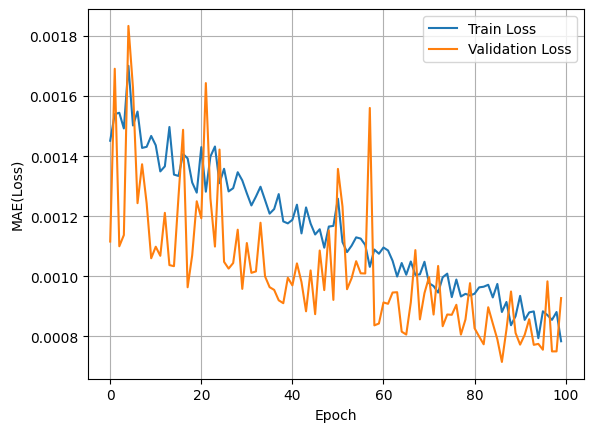

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE(Loss)')
plt.legend()
plt.grid(True)
plt.show()

## 실제값과 예측값 시각화

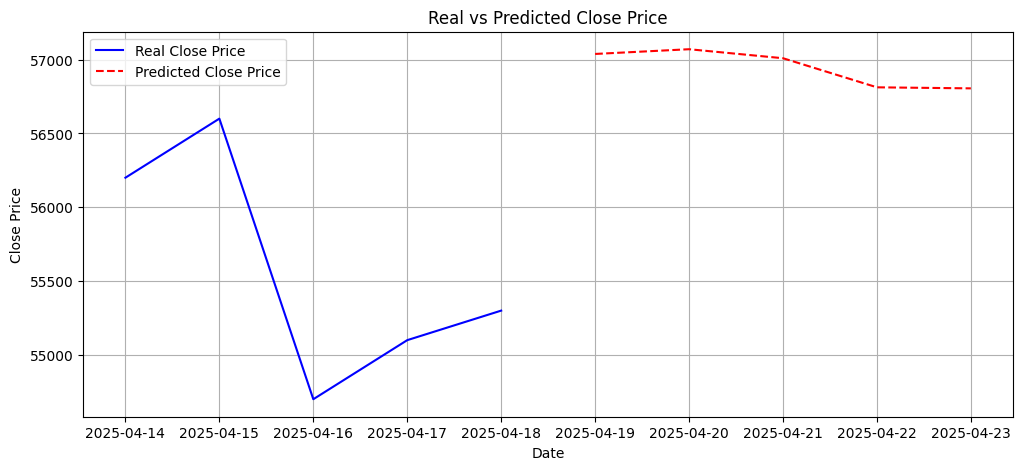

In [ ]:
real_close = stock['Close'][-5:] # 실제값
pred_close = predict_df['Close'] # 예측값

full_dates = real_close.index.tolist() + pred_close.index.tolist()
full_close = list(real_close.values) + list(pred_close.values)

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(real_close.index, real_close.values, label='Real Close Price', color='blue')
plt.plot(pred_close.index, pred_close.values, label='Predicted Close Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Real vs Predicted Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 4/14일 기준으로 5일간의 주가 예측
# 실제값과 비교

predict_start_date = pd.to_datetime('2025-04-14')

# 입력값: 4월14일 20일 전
predict_input = stock.loc[predict_start_date - pd.Timedelta(days=standard_days):predict_start_date - pd.Timedelta(days=1)]
# 예측할 값: 4월14일부터 5일 후
predict_target = stock.loc[predict_start_date:predict_start_date + pd.Timedelta(days=forecast_days - 1)]
real_close = predict_target['Close']

# 스케일링
scaled_input = scaler_X.transform(predict_input)
X_input = np.array([scaled_input]) # (1,20,8)

# 예측
predicted_scaled = model.predict(x_input).reshape(-1, 1)
predicted_close = scaler_y.inverse_transform(predicted_scaled).flatten()

predicted_df = pd.DataFrame({
    'Real_Close': real_close.values,
    'Predicted_Close': predicted_close.astype(int)
}, index=real_close.index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [ ]:
print(predicted_df)

            Real_Close  Predicted_Close
Date                                   
2025-04-14       56200            57038
2025-04-15       56600            57070
2025-04-16       54700            57009
2025-04-17       55100            56812
2025-04-18       55300            56805


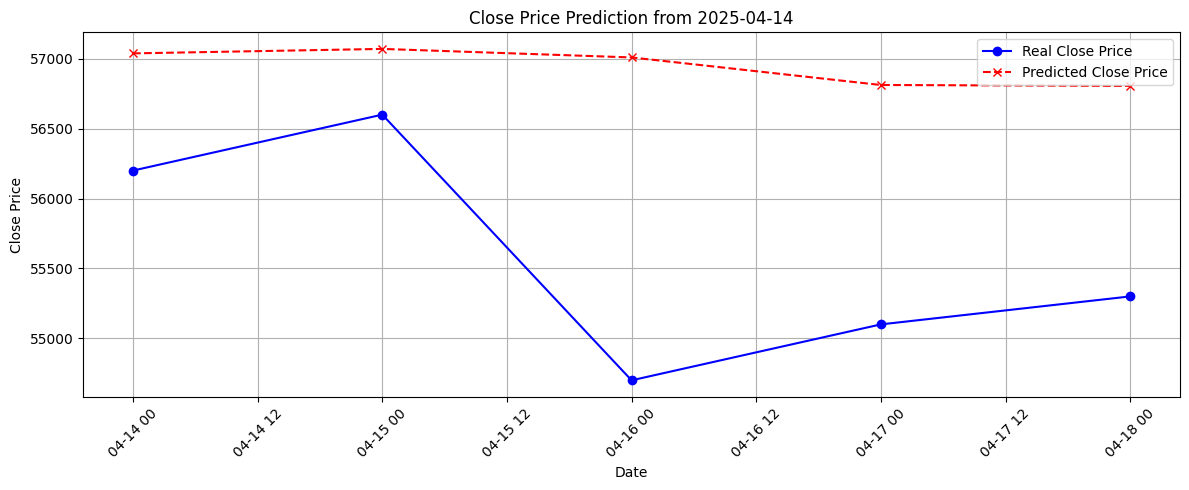

In [ ]:
# 시각화

plt.figure(figsize=(12, 5))
plt.plot(predicted_df.index, predicted_df['Real_Close'], label='Real Close Price', marker='o', color='blue')
plt.plot(predicted_df.index, predicted_df['Predicted_Close'], label='Predicted Close Price', linestyle='--', marker='x', color='red')

plt.title(f"Close Price Prediction from {predict_start_date.strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 오차 계산
mae = np.mean(np.abs(predicted_df['Real_Close'].values - predicted_df['Predicted_Close'].values))
print(f"평균 절대 오차 (MAE): {mae:.2f} 원")

평균 절대 오차 (MAE): 1366.80 원


In [ ]:
# 스케일러 저장
import joblib

joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']